In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

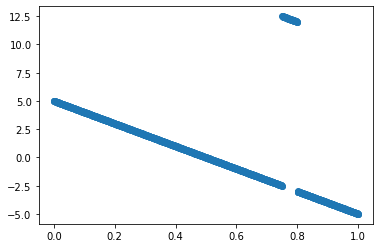

In [4]:
x, y = generate_data()
plt.scatter(x, y)
plt.show()

**The thing that is out of the ordinary about the line is that between the values of 0.75 and 0.8  the values have been shiffed up by a certain amount creating a discontinuity in the line.**

# 2. Implement linear regression (2.5 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

current weights:  [-26.6242701  10.875    ]
current loss:  25.393171251966734


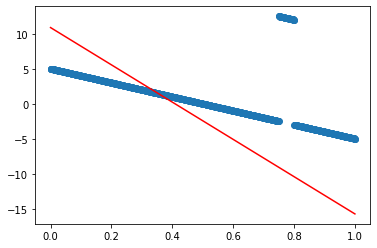

current weights:  [-25.03019345  12.46856753]
current loss:  18.195684061383226


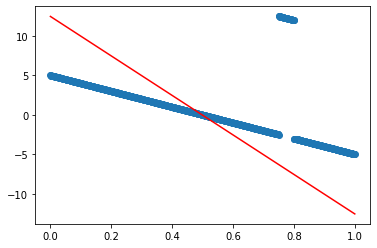

current weights:  [-24.10032109  12.86683213]
current loss:  16.557787002216994


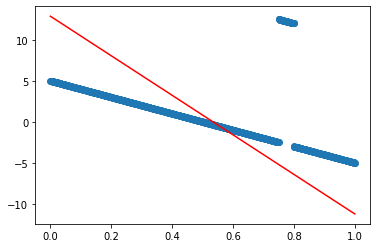

current weights:  [-23.42507118  12.83349634]
current loss:  15.708971975977613


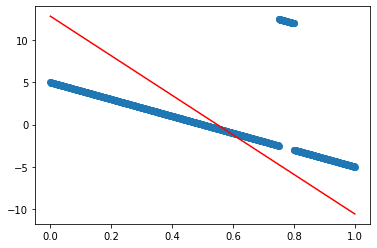

current weights:  [-22.85408529  12.64801596]
current loss:  15.006729103848382


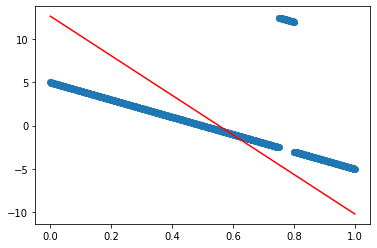

current weights:  [-22.33194126  12.4125293 ]
current loss:  14.362262204223025


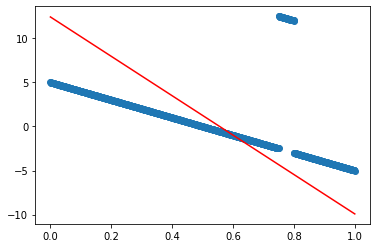

current weights:  [-21.83799312  12.16424997]
current loss:  13.761194659682685


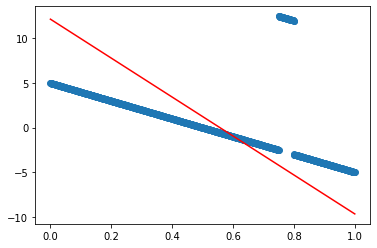

current weights:  [-21.36434105  11.91662326]
current loss:  13.19928891477063


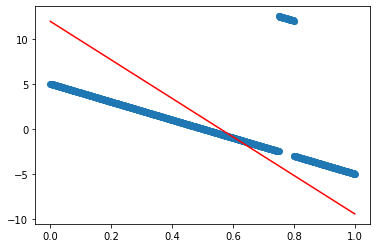

current weights:  [-20.90776382  11.67439689]
current loss:  12.67381662077371


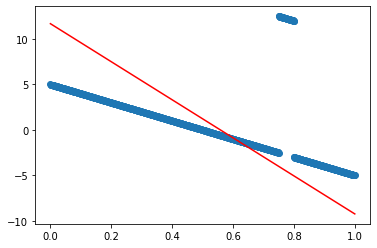

current weights:  [-20.46676429  11.4391394 ]
current loss:  12.182391748080114


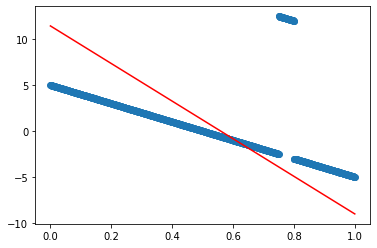

current weights:  [-20.04048709  11.21126077]
current loss:  11.722805049453546


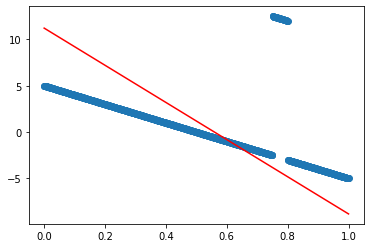

current weights:  [-19.628322    10.99075216]
current loss:  11.292993383659685


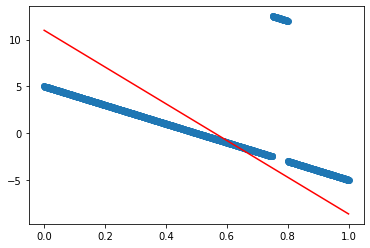

current weights:  [-19.22975831  10.77745658]
current loss:  10.891027672101549


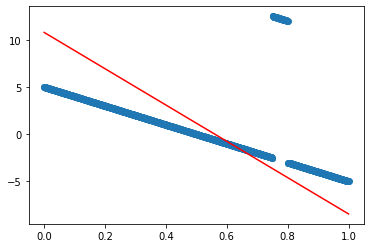

current weights:  [-18.84433126  10.57116787]
current loss:  10.515103867739265


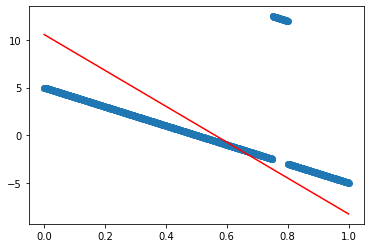

current weights:  [-18.47160202  10.37166675]
current loss:  10.163534808398941


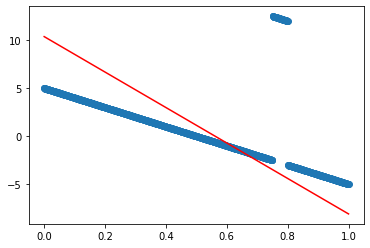

current weights:  [-18.11115014  10.17873388]
current loss:  9.834742638009654


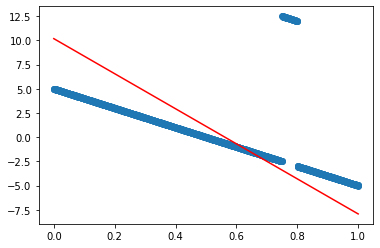

current weights:  [-17.76257042   9.99215447]
current loss:  9.527251724222635


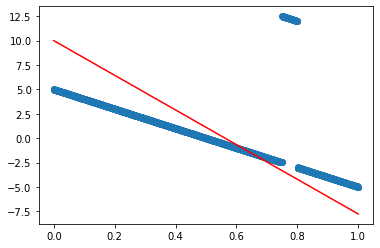

current weights:  [-17.42547154   9.81171984]
current loss:  9.239682035593967


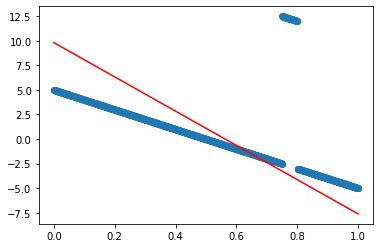

current weights:  [-17.09947528   9.63722781]
current loss:  8.970742947932433


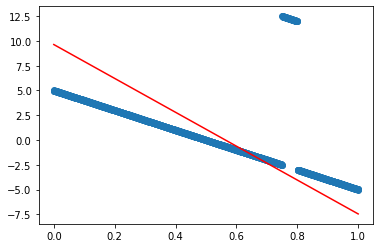

current weights:  [-16.7842159    9.46848272]
current loss:  8.719227451924697


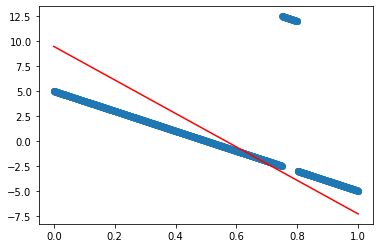

current weights:  [-16.47933979   9.30529534]
current loss:  8.484006736029233


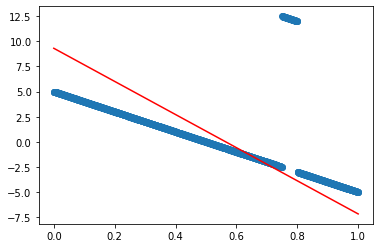

current weights:  [-16.18450494   9.14748262]
current loss:  8.264025120325226


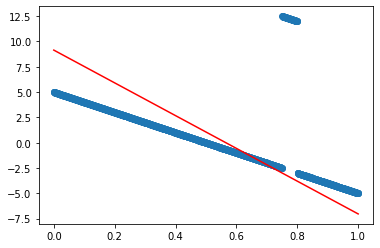

current weights:  [-15.89938065   8.99486754]
current loss:  8.058295318579148


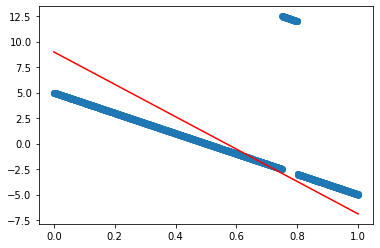

current weights:  [-15.6236471    8.84727894]
current loss:  7.86589400726489


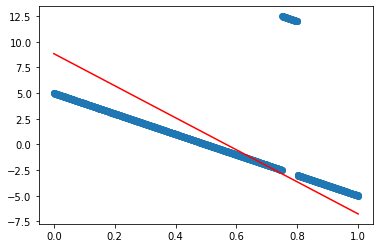

current weights:  [-15.35699498   8.70455124]
current loss:  7.685957681651081


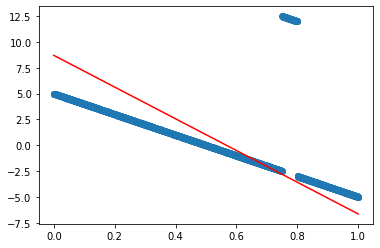

current weights:  [-15.0991252    8.56652437]
current loss:  7.5176787803575476


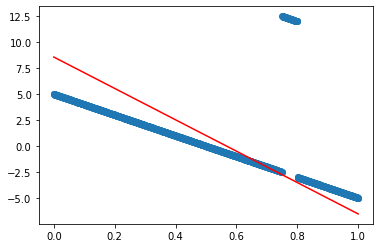

current weights:  [-14.84974851   8.43304348]
current loss:  7.360302060987737


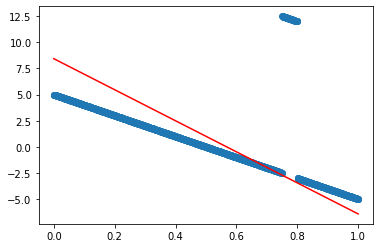

current weights:  [-14.60858519   8.30395887]
current loss:  7.213121210570838


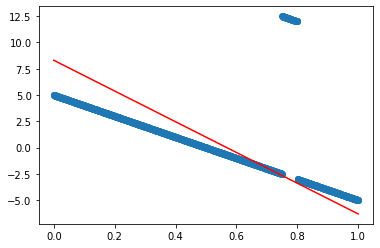

current weights:  [-14.37536471   8.17912573]
current loss:  7.075475675601091


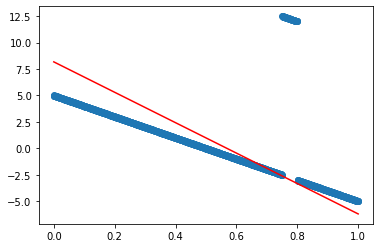

current weights:  [-14.14982549   8.05840404]
current loss:  6.946747697447396


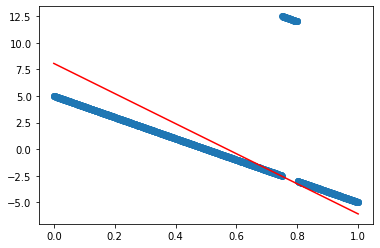

current weights:  [-13.93171452   7.94165839]
current loss:  6.82635953982805


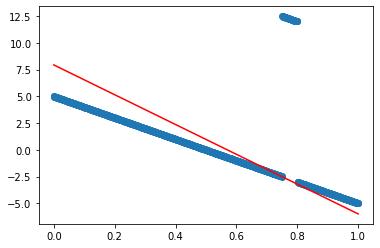

current weights:  [-13.72078717   7.82875783]
current loss:  6.713770895907327


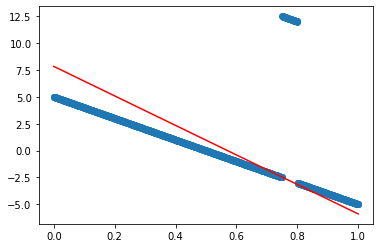

current weights:  [-13.51680683   7.71957571]
current loss:  6.608476463376943


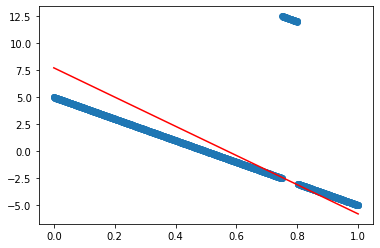

current weights:  [-13.31954469   7.61398956]
current loss:  6.510003676639213


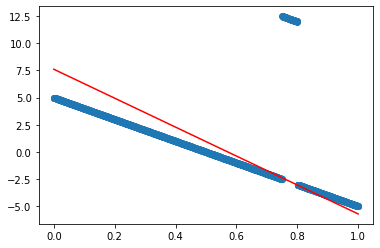

current weights:  [-13.1287795    7.51188095]
current loss:  6.41791058591387


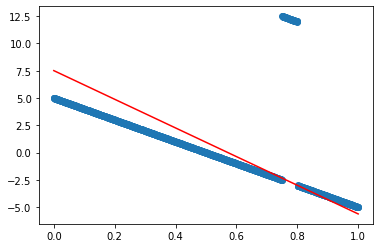

current weights:  [-12.94429727   7.41313535]
current loss:  6.3317838737498775


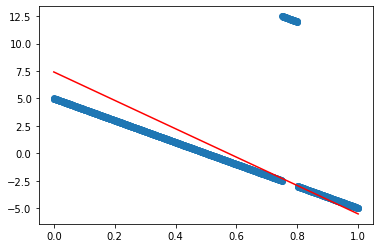

current weights:  [-12.76589106   7.31764199]
current loss:  6.2512370000403035


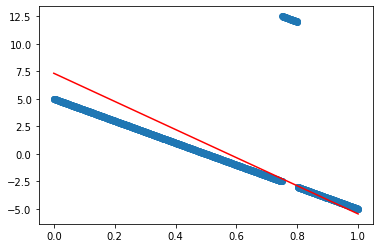

current weights:  [-12.59336077   7.22529376]
current loss:  6.175908467214932


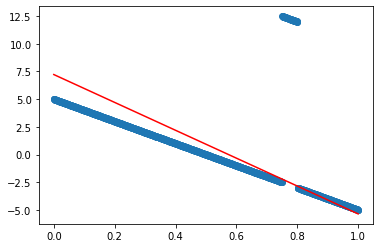

current weights:  [-12.42651285   7.13598707]
current loss:  6.105460197824824


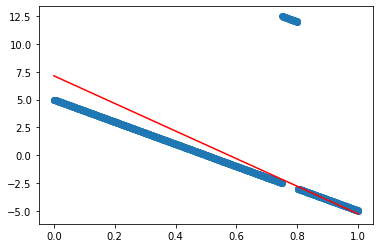

current weights:  [-12.26516017   7.04962175]
current loss:  6.0395760172372865


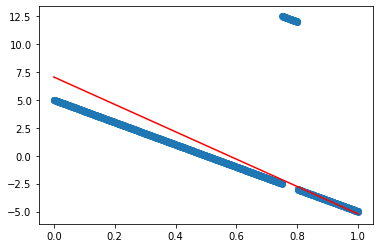

current weights:  [-12.10912173   6.96610092]
current loss:  5.977960234631549


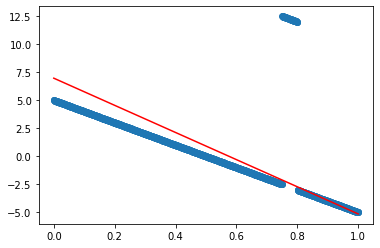

array([-12.10912173,   6.96610092])

In [31]:
learning_rate = 0.5
w = np.array([-30.0,6])

def lin_reg(x,w):
  return x*w[0] + w[1]

def loss(lin_reg, x, y, w):
  return np.sum(np.square(lin_reg(x, w)-y))/(2*len(x))

def compute_gradients(x, y, w,lin_reg):
  m_grad = np.sum(np.multiply((lin_reg(x, w)-y),x))/len(x) 
  b_grad = np.sum(lin_reg(x,w)-y)/len(x)
  return m_grad, b_grad


def gradient_descent(x, y, w, learning_rate, lin_reg):
  while(True):
    m_grad , b_grad = compute_gradients(x, y, w, lin_reg)
    w[0] = w[0] - learning_rate*m_grad
    w[1] = w[1] - learning_rate*b_grad
    print("current weights: ",w)
    print("current loss: " ,loss(lin_reg, x, y, w))
    plt.plot(x, lin_reg(x,w), '-r', label='lin reg approximation')
    plt.scatter(x, y)
    plt.show()
    #TODO FIND BETTER WAY TO STOP ITTERATIONS - define small threshold of a difference, and if two consecutive values are too close then cut off
    #TODO - PLOT THE LOSS DURING TRAINING
    if (loss(lin_reg, x, y, w) < 6):
      return w

loss(lin_reg, x, y, w)
gradient_descent(x, y, w, learning_rate, lin_reg)

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


# 4. "Robust" linear regression (1 point)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?